In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats as st

In [3]:
#setting style
plt.style.use('seaborn-pastel')

In [4]:
#importing datasets
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
#function to print key info
def preliminary_analysis(df):
    print(df.info())
    print("""
    
    """)
    print(df.describe())
    print("""
    
    """)
    print(df.head())



In [6]:
preliminary_analysis(df_0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

    
    
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331  

In [7]:
preliminary_analysis(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

    
    
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755  

In [8]:
preliminary_analysis(df_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

    
    
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262  

There's no obvious issues with the data. 

Let's visualise the distribution

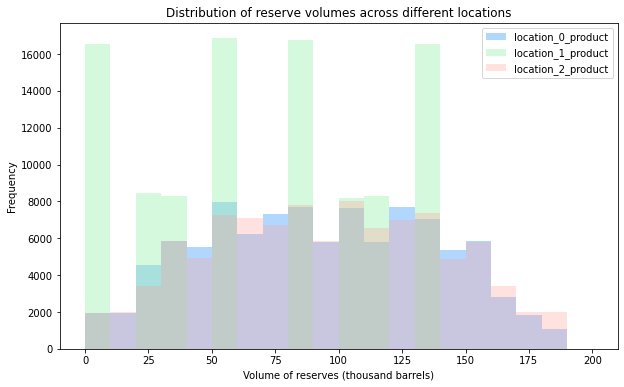

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df_0['product'], bins= list(range(0,201,10)), label='location_0_product', alpha = 0.7)
plt.hist(df_1['product'], bins= list(range(0,201,10)), label='location_1_product', alpha = 0.4)
plt.hist(df_2['product'], bins= list(range(0,201,10)), label='location_2_product', alpha = 0.3)
plt.xlabel('Volume of reserves (thousand barrels)')
plt.ylabel('Frequency')
plt.title('Distribution of reserve volumes across different locations')
plt.legend(loc = 'best')
plt.show()

We can see that locations 0 and 2 have fairly similar distributions, whilst volumes at location 1 appear to fall into a few distinct values.

### Training and testing the model

In [42]:
#creating a function to split, train, test and predict for each region
def train_test(df):
    X = df[['f0', 'f1', 'f2']]
    y = df['product']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 1)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    rmse = mean_squared_error(y_val, predictions)**0.5
    avg_vol = predictions.mean()
    
    print(f'Average volume of predicted reserves: {avg_vol:.2f}, RMSE: {rmse:.2f}')
    
    plt.figure(figsize=(6, 6))
    plt.plot(y_val, predictions, 'o', alpha = 0.2)
    plt.xlabel('True volume of reserves (thousand barrels)')
    plt.ylabel('Predicted volume of reserves (thousand barrels)')
    plt.title('Predicted Volume v True Volume')
    plt.show()
    print('R2: ', str(r2_score(y_val, predictions)))
    return predictions, y_val, avg_vol, rmse

Average volume of predicted reserves: 92.49, RMSE: 37.74


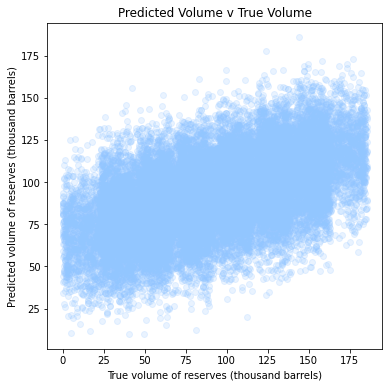

R2:  0.27728067218414654


In [43]:
#region 0
predictions_0, y_val_0, avg_vol_0, rmse_0 = train_test(df_0)

Average volume of predicted reserves: 69.12, RMSE: 0.89


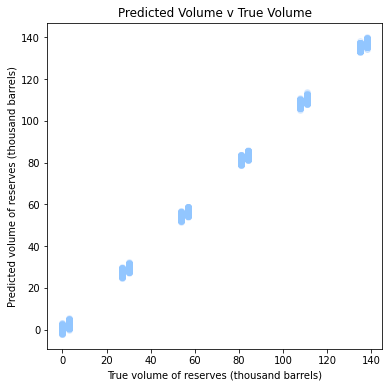

R2:  0.9996221352766932


In [44]:
#region 1 
predictions_1, y_val_1, avg_vol_1, rmse_1 = train_test(df_1)

Average volume of predicted reserves: 94.96, RMSE: 39.87


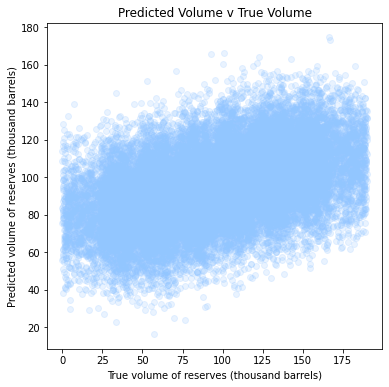

R2:  0.20003372664683905


In [45]:
#region 2
predictions_2, y_val_2, avg_vol_2, rmse_2 = train_test(df_2)

Predictions for region 1 are very highly correlated, partly due to the fewer distinct possibilities for outputs that are evident from the scatterplot.
We can see that our predictions for region 0 are the better corellated with their true values than the predictions for region 2.

### Profit 

Our investigation was given a number of conditions:
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

We can store these key values as variables, allowing us to  more easily calculate the profit for given wells.
This will allow us to calculate the volume of reserves sufficient for developing a new well without losses.

In [46]:
n = 500
n_best = 200
n_wells = 200
budget = 100000000
revenue_per_barrel = 4.5
barrels_per_unit = 1000
rev_per_unit = revenue_per_barrel * barrels_per_unit
risk = 0.025

without_losses = budget/n_best/(rev_per_unit)

In [47]:
print(f'The volume of reserves sufficient for developing a new well without losses is: {without_losses}')

The volume of reserves sufficient for developing a new well without losses is: 111.11111111111111


In [58]:
#function to compare the volumes necessary to avoid a loss with volume in each region
def count_over(df, n):
    l = len(df[df['product'] >= without_losses])
    avg = df['product'].median()
    print(f'Median volume in region: {avg:.2f}')
    print(f'Number of locations with product greater than {n:.2f}: {l}')
    print("""
    """)

In [59]:
count_over(df_0, without_losses)
count_over(df_1, without_losses)
count_over(df_2, without_losses)

Median volume in region: 91.85
Number of locations with product greater than 111.11: 36583

    
Median volume in region: 57.09
Number of locations with product greater than 111.11: 16537

    
Median volume in region: 94.93
Number of locations with product greater than 111.11: 38178

    


We can see that region 3 has the highest median volume as well as the greatest number of wells above the volume require to not make a loss.

### Profit calculation

We can pick the wells with the highest predicted volume then calculate the expected profit in that region.

In [60]:
def profit(target, predictions):
    #collecting and sorting target and probabilities
    target = pd.Series(target).reset_index(drop=True)
    predictions = pd.Series(predictions)
    preds_sorted = predictions.sort_values(ascending=False)
    #selecting the n_best number of highest predicted values
    selected = target[preds_sorted.index][:n_best]
    return (selected.sum()* (rev_per_unit)) - budget

In [62]:
profit(y_val_0,  predictions_0)

32607814.178141803

In [63]:
profit(y_val_1,  predictions_1)

24150866.966815114

In [64]:
profit(y_val_2,  predictions_2)

25630933.521668285

### Calculating risk and profits

We will calculate the risk and profit for each region using the bootstrapping technique with 1000 samples to find the distribution of profit, then find the average profit, 95% confidence interval and risk of losses.

In [65]:
#Function to use bootstrapping to find distribution of profits
def bootstrap_profit(target, predictions):
    profits = []
    target = pd.Series(target).reset_index(drop=True)
    state = np.random.RandomState(1)
    for i in range(1000):
        target_subsample = target.sample(n=n, replace=True, random_state = state)
        preds_subsample = predictions[target_subsample.index]
        profits.append(profit(target_subsample, preds_subsample))

    profits = pd.Series(profits)
    print(f'Percent of samples that make a profit: {100* profits.gt(0).sum()/len(profits)}%')

    plt.figure(figsize=(10, 5))

    plt.grid(axis = 'y', linewidth = 0.3, linestyle = "--")
    #weighted to use proportion rather than absolute number
    plt.hist(profits, weights= np.ones(len(profits)) / len(profits), bins= np.linspace(-1e7,2e7,31), edgecolor='black',  alpha = 0.7)
    
    plt.xlabel('Profit (Millions of Dollars)')
    plt.ylabel('Proportion of Samples')
    plt.title('Proportion of Samples Making a Given Profit')
    plt.ylim(0,0.2)
    plt.show()
    
    return profits


Percent of wells that make a profit: 94.8%


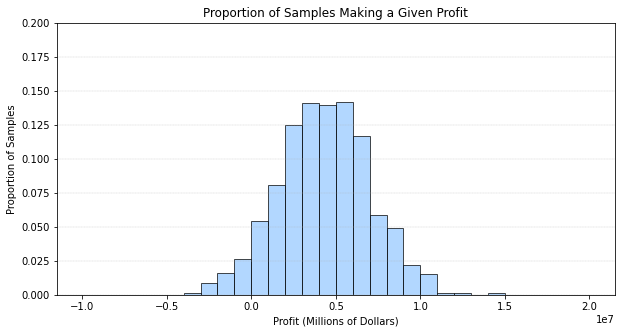

In [66]:
bs0 = bootstrap_profit(y_val_0, predictions_0)

Percent of wells that make a profit: 99.0%


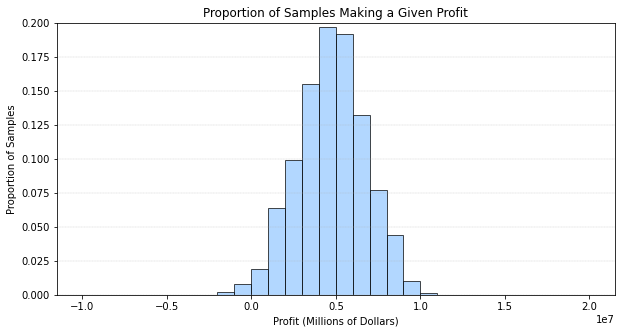

In [67]:
bs1 = bootstrap_profit(y_val_1, predictions_1)

Percent of wells that make a profit: 92.7%


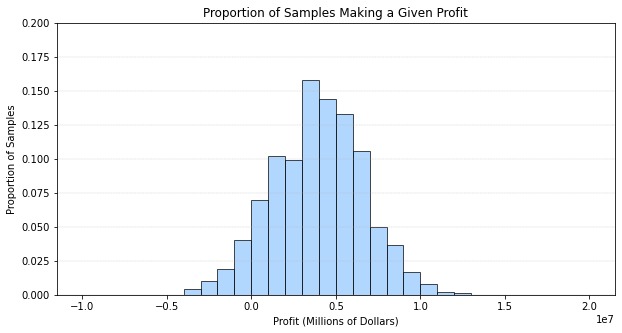

In [68]:
bs2 = bootstrap_profit(y_val_2, predictions_2)

We can see that region 1 has the highest percentage of wells making a profit. Let's look at average profit, confidence intervals and risk.

In [69]:
def find_confidence_interval(profits):
    ci = st.t.interval(0.95, len(profits)-1, profits.mean(), profits.sem())
    risk = len(profits[profits < 0]) / len(profits)
    print(f'Average profit: ${profits.mean():.2f}')
    print(f'95% confidence interval: ${ci[0]:.2f}, ${ci[1]:.2f}' )
    print(f'The risk of losses is {risk*100}%')

In [70]:
find_confidence_interval(bs0)

Average profit: $4330094.00
95% confidence interval: $4165024.10, $4495163.91
The risk of losses is 5.2%


In [71]:
find_confidence_interval(bs1)

Average profit: $4751972.43
95% confidence interval: $4628545.37, $4875399.49
The risk of losses is 1.0%


In [72]:
find_confidence_interval(bs2)

Average profit: $3947512.89
95% confidence interval: $3781853.97, $4113171.81
The risk of losses is 7.3%


### Findings

Region 1 appears to be most appealing for development despite it having the lowest median volume and the lowest average predicted reserves across all sites.
However, in our bootsrapped samples:

- 99% of samples made a profit
- The average profit was $4751972.43
- Our 95% confidence interval is between $4628545.37 and $4875399.49 (Even the lower confidence limit is greater than the other two regions upper limit)
- It has the lowest risk of losses, at 